# Generative model for histological FOV data

Load data

In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from matplotlib import figure
import numpy as np

In [2]:
with open("BreastIHC_APIresponse.json", "r") as f:
    data = json.load(f)

In [3]:
cells = data["response"]["results"]["cells"]
df = pd.DataFrame.from_dict(cells)

670 1171


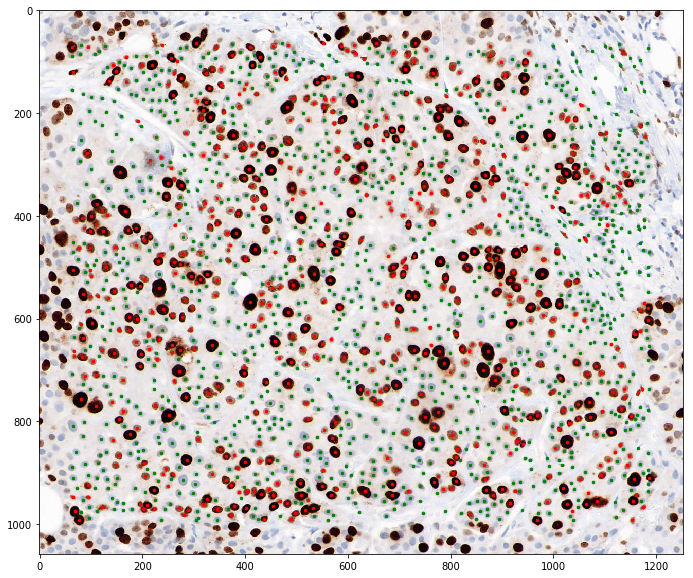

In [4]:
intensity_threshold = 0.5
df.loc[df.intensity < intensity_threshold, "type"] = "non_tumor"
df.loc[df.intensity >= intensity_threshold, "type"] = "tumor"

grouped_by_type = df.groupby("type")
tumor_cells = grouped_by_type.get_group("tumor")
non_tumor_cells = grouped_by_type.get_group("non_tumor")

img = plt.imread("labA_0.722f7db3.png")

plt.imshow(img)
plt.scatter(tumor_cells.x + 64, tumor_cells.y + 64, s = 6, c = 'red')
plt.scatter(non_tumor_cells.x + 64, non_tumor_cells.y + 64, s = 6, c = 'green')

fig = plt.gcf()

fig.set_size_inches(18, 10, forward=True)

print(len(tumor_cells.index), len(non_tumor_cells.index))

In [5]:
df.x[0]
df.y[0]

0

In [17]:
crop_size = (32, 32)
cell_data = df.copy(deep = False)

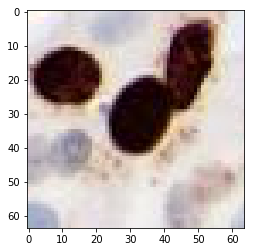

tumor


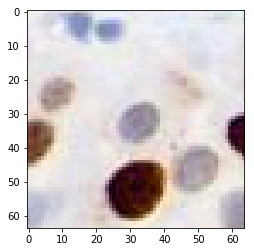

non_tumor


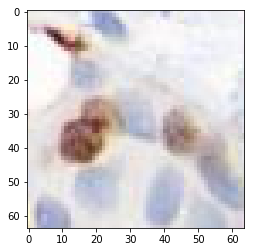

non_tumor


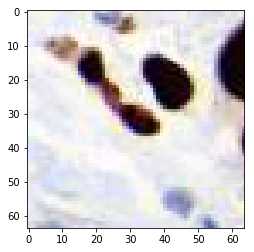

tumor


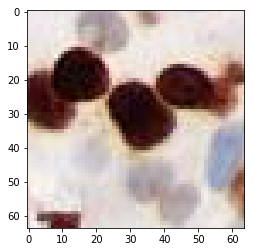

tumor


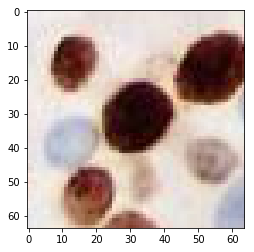

tumor


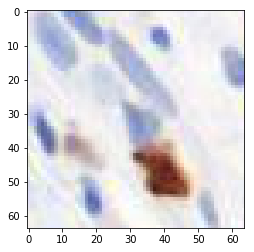

non_tumor


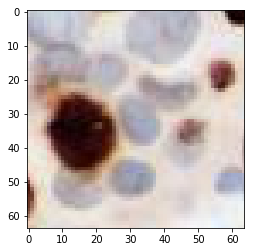

non_tumor


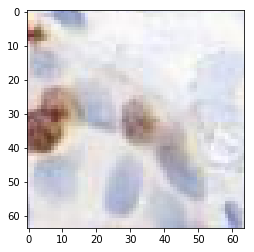

tumor


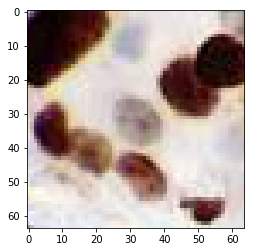

tumor


In [36]:
plt.ion()

image_data = []
images = []
for index, row in df.iterrows():
    center = (df.x[index] + 64, df.y[index] + 64) # center of the region
    
    cropped = img[(center[1] - crop_size[1]):(center[1] + crop_size[1]),
               (center[0] - crop_size[0]):(center[0] + crop_size[0]),:]
    
    image_data.append(cropped)
    images.append(PIL.Image.fromarray(np.uint8(cropped*255)))
    
    if index < 10:
        plt.imshow(image_data[index])
        plt.show()
        print(df.type[index])
    

In [37]:
cell_data["image_data"] = image_data
cell_data["image"] = images

In [38]:
cell_data.head()

,intensity,type,x,y,image_data,image
0,0.715734,tumor,241,0,"[[[0.9843137, 0.9882353, 0.9647059], [0.976470...",<PIL.Image.Image image mode=RGB size=64x64 at ...
1,0.422294,non_tumor,311,2,"[[[0.94509804, 0.9529412, 0.9411765], [0.94509...",<PIL.Image.Image image mode=RGB size=64x64 at ...
2,0.339541,non_tumor,408,0,"[[[0.91764706, 0.9137255, 0.8980392], [0.92156...",<PIL.Image.Image image mode=RGB size=64x64 at ...
3,0.633990,tumor,487,0,"[[[0.9647059, 0.93333334, 0.9764706], [0.96862...",<PIL.Image.Image image mode=RGB size=64x64 at ...
4,0.712005,tumor,590,0,"[[[0.92156863, 0.90588236, 0.9098039], [0.9333...",<PIL.Image.Image image mode=RGB size=64x64 at ...


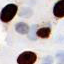

In [45]:
cell_data.image[np.random.randint(0, len(cell_data.index))]